# Weather Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [2]:
import pandas as pd
weather_df=pd.read_csv("project dataset weather.csv")
weather_df

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,12/27/2015,8.6,4.4,1.7,2.9,rain
1457,12/28/2015,1.5,5.0,1.7,1.3,rain
1458,12/29/2015,0.0,7.2,0.6,2.6,fog
1459,12/30/2015,0.0,5.6,-1.0,3.4,sun


In [8]:
weather_df.shape

(1461, 6)

In [9]:
weather_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain


In [10]:
weather_df.info

<bound method DataFrame.info of             date  precipitation  temp_max  temp_min  wind  weather
0       1/1/2012            0.0      12.8       5.0   4.7  drizzle
1       1/2/2012           10.9      10.6       2.8   4.5     rain
2       1/3/2012            0.8      11.7       7.2   2.3     rain
3       1/4/2012           20.3      12.2       5.6   4.7     rain
4       1/5/2012            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  12/27/2015            8.6       4.4       1.7   2.9     rain
1457  12/28/2015            1.5       5.0       1.7   1.3     rain
1458  12/29/2015            0.0       7.2       0.6   2.6      fog
1459  12/30/2015            0.0       5.6      -1.0   3.4      sun
1460  12/31/2015            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]>

In [11]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


<Axes: xlabel='weather', ylabel='count'>

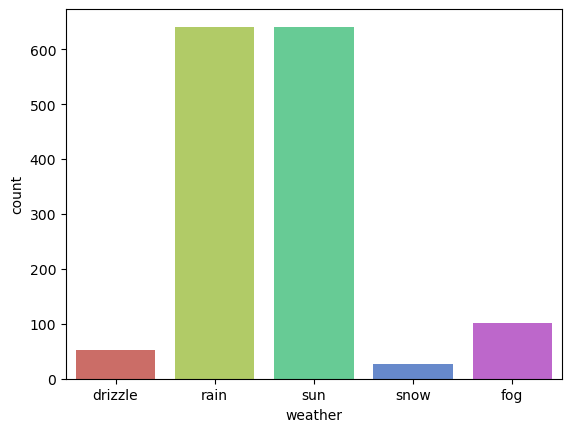

In [11]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x="weather",data =weather_df,palette="hls")

In [13]:
#From the Above countplot the data set contains higher amount of data with the weather datail of Rain and Sun and 
#it also have some additionals like drizzle,snow and fog.

In [14]:
countrain=len(weather_df[weather_df.weather=="rain"])
countsun=len(weather_df[weather_df.weather=="sun"])
countdrizzle=len(weather_df[weather_df.weather=="drizzle"])
countsnow=len(weather_df[weather_df.weather=="snow"])
countfog=len(weather_df[weather_df.weather=="fog"])
print("Percent of Rain:{:2f}%".format((countrain/(len(weather_df.weather))*100)))
print("Percent of Sun:{:2f}%".format((countsun/(len(weather_df.weather))*100)))
print("Percent of Drizzle:{:2f}%".format((countdrizzle/(len(weather_df.weather))*100)))
print("Percent of Snow:{:2f}%".format((countsnow/(len(weather_df.weather))*100)))
print("Percent of Fog:{:2f}%".format((countfog/(len(weather_df.weather))*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


# **NUMERICAL OR CONTINUOUS VARIABLES**

  Next we will explore the ***Continuous variables***

In [15]:
weather_df[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


# Distribution of numerical value using Histogram plot .

In [16]:
#From the above distribution it is clear that precipitation and wind are Positively skewed.

#And temp_min is Negatively skewed and both has some outliers.

In [17]:
#We can find the outliers in the dataset by using following plots:

 # 1.Hist plot
 # 2.Box plot
 # 4.Dist plot
# yet both box and violin plots are easier to handel with

<Axes: xlabel='wind', ylabel='Count'>

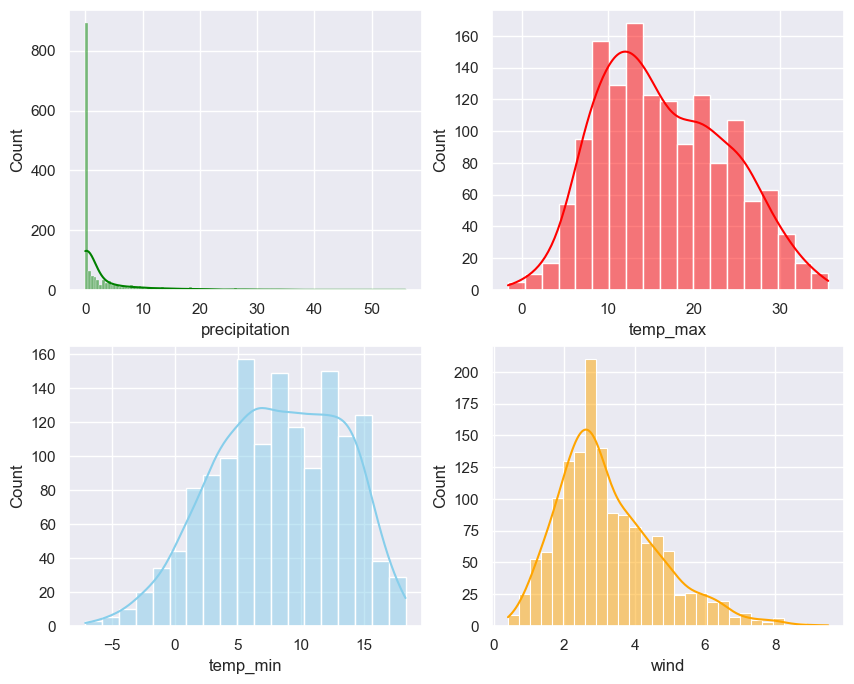

In [18]:
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=weather_df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=weather_df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=weather_df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=weather_df,x="wind",kde=True,ax=axs[1,1],color='orange')

# BELOW DIAGRAM SHOWS THE EXACT OF HOW THE SKEWNESS LOOKS

# HOW TO FIND THE OUTILERS OR SKEW IN DATA SET

In [19]:
![skw.png](attachment:395c4894-9fd5-4d09-b1ea-4b89be44c12d.png)

'[skw.png]' is not recognized as an internal or external command,
operable program or batch file.


# HEATMAP

In [20]:
# Get the most important features
weather_df.corr()

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.228555,-0.072684,0.328045
temp_max,-0.228555,1.000000,0.875687,-0.164857
temp_min,-0.072684,0.875687,1.000000,-0.074185
wind,0.328045,-0.164857,-0.074185,1.000000


<Axes: >

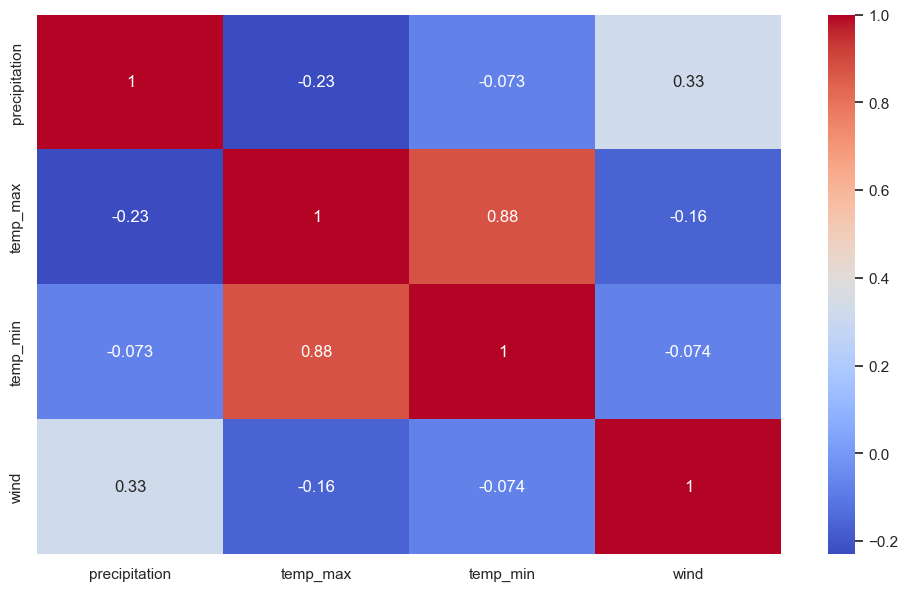

In [21]:
plt.figure(figsize=(12,7))
sns.heatmap(weather_df.corr(),annot=True,cmap= 'coolwarm')

In [22]:
#There is a positive correlation between temp_max and temp_min.

# Numerical - Numerical

Pearson correlation: -0.1648566348749545


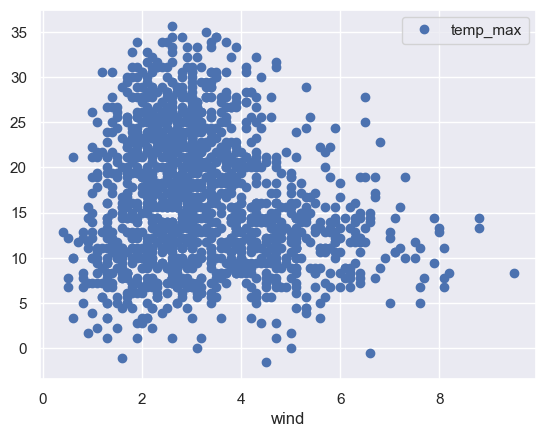

In [23]:
weather_df.plot("wind","temp_max",style='o') 
print("Pearson correlation:",weather_df["wind"].corr(weather_df["temp_max"]))

In [24]:
#As from the above result of T test and P value of 0 indicates that the Null hypothesis in the corresponding
#columns is rejected and the columns are Statistically significant 

<Axes: xlabel='temp_max'>

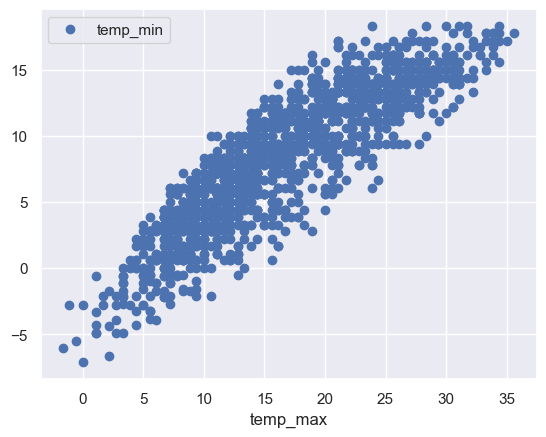

In [25]:
weather_df.plot("temp_max","temp_min",style='o') 

# NULL VALUES

# data Cleaning

In [26]:
weather_df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [27]:
#Checking for Null values in the data set

# DATA PREPROCESSING:

In [28]:
# Drop Unnecessary Variables

#In this data set Date is a unnecessary variable as it does not affect the data so it can be dropped.

In [29]:
weather_df=weather_df.drop(["date"],axis=1)

In [30]:
weather_df.shape

(1461, 5)

# Skewed Distribution Treatment

In [31]:
import numpy as np
weather_df.precipitation=np.sqrt(weather_df.precipitation)
weather_df.wind=np.sqrt(weather_df.wind)

<Axes: xlabel='wind', ylabel='Count'>

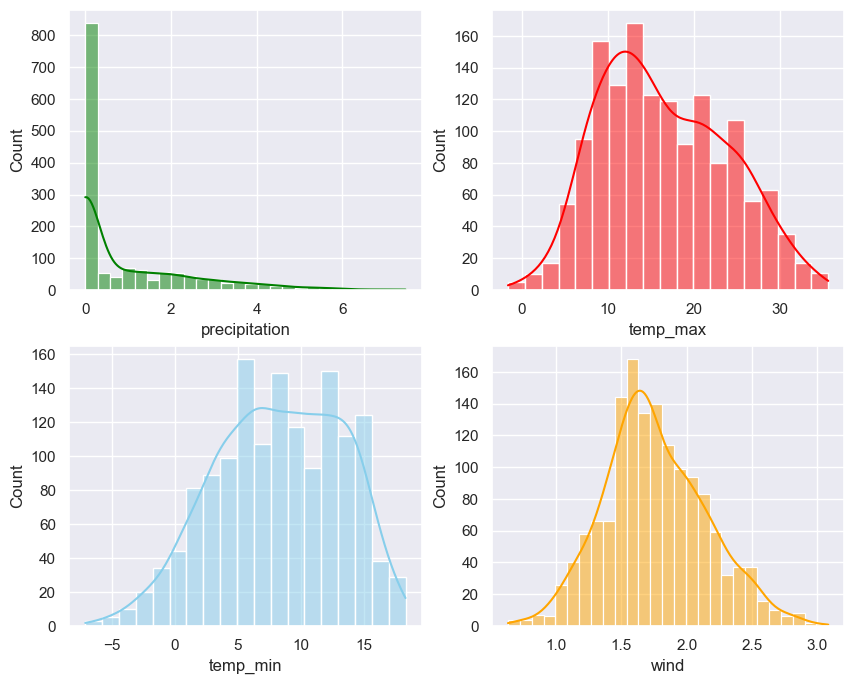

In [32]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2,2,figsize=(10,8))
sns.histplot(data=weather_df,x="precipitation",kde=True,ax=axs[0,0],color='green')
sns.histplot(data=weather_df,x="temp_max",kde=True,ax=axs[0,1],color='red')
sns.histplot(data=weather_df,x="temp_min",kde=True,ax=axs[1,0],color='skyblue')
sns.histplot(data=weather_df,x="wind",kde=True,ax=axs[1,1],color='orange')

In [33]:
weather_df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,drizzle
1,3.301515,10.6,2.8,2.121320,rain
2,0.894427,11.7,7.2,1.516575,rain
3,4.505552,12.2,5.6,2.167948,rain
4,1.140175,8.9,2.8,2.469818,rain


# Feature Scaling

In [34]:
# Scaling the weather variables using label Encoder
from sklearn.preprocessing import StandardScaler,LabelEncoder
lc=LabelEncoder()
weather_df["weather"]=lc.fit_transform(weather_df["weather"])

In [35]:
weather_df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
1,3.301515,10.6,2.8,2.121320,2
2,0.894427,11.7,7.2,1.516575,2
3,4.505552,12.2,5.6,2.167948,2
4,1.140175,8.9,2.8,2.469818,2


# splitting

In [36]:
#SPLITTING THE DATASET INTO DEPENDANT AND INDEPENDANT VARIABLES

In [37]:
x=((weather_df.loc[:,weather_df.columns!="weather"]).astype(int)).values[:,0:]
y=weather_df["weather"].values

In [38]:
weather_df.weather.unique()

array([0, 2, 4, 3, 1])

In [41]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

# ALGORITHMS AND MODEL TRAINING:

# K-NEAREST NEIGHBOR CLASSIFIER

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:69.28%


# SUPPORT VECTOR MACHINE - CLASSIFIER

In [43]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))

SVM Accuracy:78.50%
